## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [39]:
# Combine the data into a single dataset with an outermerge (class demo - merging)
merged_df = pd.merge(mouse_metadata, study_results , on="Mouse ID", how="outer")
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [40]:
#get number of mice
pre_drop_mouse_count = len(merged_df["Mouse ID"].unique())
print("Number of Mice: " + str(pre_drop_mouse_count))

Number of Mice: 249


In [41]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_df[['Mouse ID', 'Timepoint']]
duplicate_mice = duplicate_mice[duplicate_mice.duplicated()]
duplicate_mice.tail()

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [42]:
# Optional: Get all the data for the duplicate mouse ID. 
# cant include the tumor volume and metastatic sites
duplicate_mice = merged_df[['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)','Timepoint', 
                            'Tumor Volume (mm3)', 'Metastatic Sites']]
# duplicate_mice = duplicate_mice[duplicate_mice.duplicated()]
duplicate_mice[duplicate_mice['Mouse ID']=="g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [43]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html)
#drop mouse by criteria Mouse ID = g989 - https://hackersandslackers.com/pandas-dataframe-drop/
mouse_df = merged_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
mouse_df = mouse_df[mouse_df["Mouse ID"] != "g989"]
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [45]:
# Checking the number of mice in the clean DataFrame.
mouse_count = len(mouse_df["Mouse ID"].unique())
print("Number of Mice: " + str(mouse_count))

Number of Mice: 248


In [46]:
#list of drug regimens
mouse_df["Drug Regimen"].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

## Summary Statistics

In [10]:
#https://stackoverflow.com/questions/46639182/calculating-mean-std-dev-and-variance-and-creating-a-new-data-frame-from-these
drug_mean = mouse_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
drug_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [11]:
drug_median = mouse_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
drug_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [12]:
drug_var = mouse_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
drug_var

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [13]:
drug_std = mouse_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
drug_std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [14]:
drug_sem = mouse_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
drug_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [15]:
# Summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# similar to pandas_challenge (creating dataframe with groupby)
# how do i get this to show tumor?
drug_stats = pd.DataFrame({"Mean" : drug_mean,
                           "Median": drug_median,
                           "Variance": drug_var, 
                           "Std. Dev": drug_std,
                           "Std. Error": drug_sem})
drug_stats

,Mean,Median,Variance,Std. Dev,Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [17]:
#Total Measurements Count
measure_count = mouse_df.groupby(["Drug Regimen"]).count()["Tumor Volume (mm3)"]
measure_count

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Tumor Volume (mm3), dtype: int64

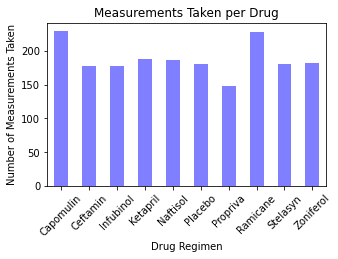

In [33]:
#Pandas Bar Chart: Total Measurements Count
measure_count.plot(kind="bar", color="b", alpha=.5, figsize=(5,3))
plt.xticks(rotation=45)
plt.title("Measurements Taken per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements Taken")
plt.show()

Text(0, 0.5, 'Number of Measurements Taken')

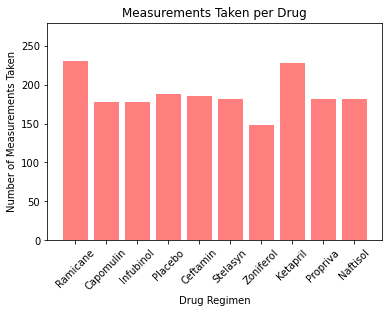

In [48]:
#Pyplot Bar Chart: Total Measurements Count
drug = ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']
measurements = measure_count

plt.bar(drug, measurements, color = "r", alpha=.5, align="center")
plt.xticks(rotation=45)
plt.xlim(-.9, len(drug)-.1)
plt.ylim(0, max(measurements) +50)
plt.title("Measurements Taken per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements Taken")

In [49]:
#Distribution of male vs. female
sex_sort = mouse_df[["Mouse ID", "Sex"]].drop_duplicates()
sex_count = sex_sort["Sex"].value_counts()
sex_count

Male      125
Female    123
Name: Sex, dtype: int64

In [ ]:
# Pandas Pie Chart: Female vs. Male


(-1.1018390827045563,
 1.103492681505578,
 -1.1031843716069307,
 1.1001516367431872)

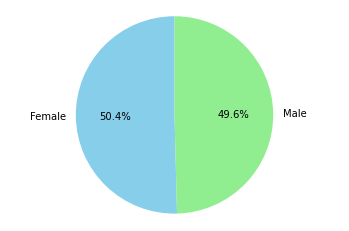

In [52]:
# #Pyplot Pie Chart: Female vs. Male
sex = ["Female", "Male"]
count = sex_count
colors = ["skyblue", "lightgreen"]

plt.pie(count, labels=sex, colors = colors, autopct="%1.1f%%", startangle=90)
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [36]:
# Start by getting the last (greatest) timepoint for each mouse
tumor_vol = pd.DataFrame(mouse_df.groupby(["Mouse ID"]).max()["Tumor Volume (mm3)"])
tumor_vol

,Tumor Volume (mm3)
Mouse ID,
a203,67.973419
a251,65.525743
a262,70.717621
a275,62.999356
a366,63.440686
...,...
z435,48.710661
z578,45.000000
z581,62.754451


In [53]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_merge = pd.merge(tumor_vol, mouse_df, on=["Tumor Volume (mm3)"])
tumor_merge
    

,Tumor Volume (mm3),Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Metastatic Sites
0,67.973419,a203,Infubinol,Female,20,23,45,2
1,65.525743,a251,Infubinol,Female,21,25,45,1
2,70.717621,a262,Placebo,Female,17,29,45,4
3,62.999356,a275,Ceftamin,Female,20,28,45,3
4,63.440686,a366,Stelasyn,Female,16,29,30,1
...,...,...,...,...,...,...,...,...
7653,45.934712,z314,Stelasyn,Female,21,28,5,0
7654,48.710661,z435,Propriva,Female,12,26,10,0
7655,62.754451,z581,Infubinol,Female,24,25,45,3
7656,65.741070,z795,Naftisol,Female,13,29,45,3


In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin, Ramicane, Infubinol, Ceftamin]

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
